# Tensorflow and Keras

## Modeling

Let's review some modeling concepts we've used to date with [this quick exercise](https://forms.gle/yrPxUp2Xj4R9FeyEA)


We do this to remind ourselves that the basic components of good modeling practice, and even the methods themselves, are _the same_ with Neural Nets as that are with _sklearn_ or _statsmodels_.

The above exercise uses only one train-test split, but is still useful.  We will be using train, validation, test in this notebook, for good practice.

## Objectives:
- Compare pros and cons of Keras vs TensorFlow
- hands on practice coding a neural network

In [1]:
import keras

Using TensorFlow backend.


Wait a second, what is that warning? 
`Using TensorFlow backend.`

<img align =left src="img/keras.png"><br>
### Keras is an API

Coded in Python, that can be layered on top of many different back-end processing systems.

![kerasback](img/keras_tf_theano.png)

While each of these systems has their own coding methods, Keras abstracts from that in streamlined pythonic manner we are used to seeing in other python modeling libraries.

Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras. Additionally, Microsoft maintains the CNTK Keras backend. Amazon AWS is maintaining the Keras fork with MXNet support. Other contributing companies include NVIDIA, Uber, and Apple (with CoreML).

Theano has been discontinued.  The last release was 2017, but can still be used.

We will use TensorFlow, as it is the most popular. TensorFlow became the most used Keras backend, and  eventually integrated Keras into via the tf.keras submodule of TensorFlow.  

## Wait, what's TensorFlow?


## Let's start with tensors

## Tensors are multidimensional matricies

![tensor](img/tensors.png)

### TensorFlow manages the flow of matrix math

That makes neural network processing possible.

![cat](img/cat-tensors.gif)

For our numbers dataset, our tensors from the sklearn dataset were originally tensors of the shape 8x8, i.e.64 pictures.  Remember, that was with black and white images.

For image processing, we are often dealing with color.

In [2]:
from sklearn.datasets import load_sample_images
image = load_sample_images()['images'][0]

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(image)

In [4]:
image.shape

(427, 640, 3)

What do the dimensions of our image above represent?

In [5]:
import numpy as np
from matplotlib import pyplot as plt

mccalister = ['Adam', 'Amanda','Chum', 'Dann',
 'Jacob', 'Jason', 'Johnhoy', 'Karim',
'Leana','Luluva', 'Matt', 'Maximilian','Syd' ]

# This is always a good idea
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.student_caller import one_random_student

import warnings
warnings.filterwarnings('ignore')

In [6]:
one_random_student(mccalister)

Matt


Tensors with higher numbers of dimensions have a higher **rank**, in the language of TensorFlow.

A matrix with rows and columns only, like the black and white numbers, are **rank 2**.

A matrix with a third dimension, like the color pictures above, are **rank 3**.

When we flatten an image by stacking the rows in a column, we are decreasing the rank. 

In [7]:
flat_image = image.reshape(-1,1)

When we unrow a column, we increase its rank.

In [8]:
unrowed = flat_image.reshape(427,640, -1)

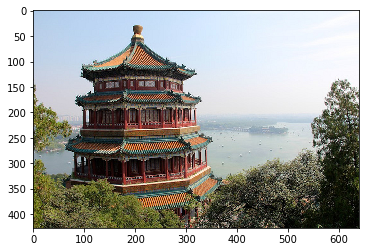

In [9]:
imgplot = plt.imshow(unrowed)

### Wait, what tool am I even using, what's Keras?
## More levers and buttons

Coding directly in **Tensorflow** allows you to tweak more parameters to optimize performance. The **Keras** wrapper makes the code more accessible for developers prototyping models.

![levers](img/levers.jpeg)

### Keras, an API with an intentional UX

- Deliberately design end-to-end user workflows
- Reduce cognitive load for your users
- Provide helpful feedback to your users

[full article here](https://blog.keras.io/user-experience-design-for-apis.html)<br>
[full list of why to use Keras](https://keras.io/why-use-keras/)

### A few comparisons

While you **can leverage both**, here are a few comparisons.

| Comparison | Keras | Tensorflow|
|------------|-------|-----------|
| **Level of API** | high-level API | High and low-level APIs |
| **Speed** |  can *seem* slower |  is a bit faster |
| **Language architecture** | simple architecture, more readable and concise | straight tensorflow is a bit more complex |
| **Debugging** | less frequent need to debug | difficult to debug |
| **Datasets** | usually used for small datasets | high performance models and large datasets that require fast execution|

This is also a _**non-issue**_ - as you can leverage tensorflow commands within keras and vice versa. If Keras ever seems slower, it's because the developer's time is more expensive than the GPUs. Keras is designed with the developer in mind. 


[reference link](https://www.edureka.co/blog/keras-vs-tensorflow-vs-pytorch/)

### Pair Challenge:

<img src="https://images.pexels.com/photos/1350560/pexels-photo-1350560.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" alt="diabetes" style ="text-align:center;width:250px;float:none" ></br>

Let's use a Keras neural net on the UCI digit dataset we imported from sklearn yesterday.

Let's continue where we left off with our numbers dataset.

In [12]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X = digits.data
y = digits.target


We will start with a binary classification, and predict whether the number will be even or odd.

In [13]:
y_binary = y % 2
y_binary

array([0, 1, 0, ..., 0, 1, 0])

In pairs, proceed through the following three parts. 

#### Part 1:
Questions to answer:
- How many input variables are there in this dataset? 
- What does the range of values (0-16) represent in our feature set?
- What does a 1 mean in our target class?
- If we use a neural net to predict this, what loss function do we use?
***

***
#### Part 2:
What if you wanted to create a NN with hidden layers to predict even numbers with:
- 12 nodes in the first hidden layer
- 8 nodes in the second hidden layer
- relu on the first two activations
- sigmoid on the last one

Answer the following questions:
- How many nodes in the input layer?
- How many nodes in the output layer?
- Will the output layer produce an integer or a float?
***

***

#### Part 3:
Knowing that you want:
- batch size of 10
- 50 epochs
- to use `rmsprop` as your optimizer
- and all the numbers you defined above...

**Fill out the code below with the correct specifications, but don't run it yet**

In [12]:
model = Sequential()
model.add(Dense(   , activation= , input_dim= ))
model.add(Dense( ,  activation= ))
model.add(Dense(  , activation =  ))

model.compile(optimizer= ,
              loss=,
              metrics=['accuracy'])
model.fit(data, labels, epochs=, batch_size=  )

SyntaxError: invalid syntax (<ipython-input-12-990b674031ad>, line 2)

### Things to know:
- the data and labels in `fit()` need to be numpy arrays, not pandas dfs. Else it won't work.
- Scaling your data will have a large impact on your model.   
   > For our traditional input features, we would use a scalar object.  For images, as long as the minimum value is 0, we can simply divide through by the maximum pixel intensity.

![gif](https://media0.giphy.com/media/3og0IMJcSI8p6hYQXS/giphy.gif)


We have come across several scenerios where scaling is important. In addition to improving the speed of gradient descent, what other scenarios did we stress scaling?

In [17]:
one_random_student(mccalister)

Amanda


#### Getting data ready for modeling
**Preprocessing**:

- use train_test_split to create X_train, y_train, X_test, and y_test
- Split training data into train and validation sets.
- Scale the pixel intensity to a value between 0 and 1.
- Scale the pixel intensity to a value between 0 and 1.


Scaling our input variables will help speed up our neural network [see 4.3](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

Since our minimum intensity is 0, we can normalize the inputs by dividing each value by the max value (16). 

In [18]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state=42, test_size=.2)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=.2)
X_t, X_val, X_test = X_t/16, X_val/16, X_test/16


Now that our data is ready, let's load in the keras Sequential class.  

Sequential refers to a sequence of layers that feed directly into one another with exactly [one input tensor and one output tensor](https://www.tensorflow.org/guide/keras/sequential_model)

In [20]:
from keras.models import Sequential

A dense layer receives input from every node from the previous layer.

In [22]:
from keras.layers import Dense

Let's start working through the different choices we can make in our network.

For activation, let's start with the familiar sigmoid function, and see how it performs.

In [23]:
np.random.seed(42)
model = Sequential()
# We will start with our trusty sigmoid function.
# What does input dimension correspond to?
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD' ,
              # We use binary_crossentropy for a binary loss function
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=10, batch_size=100, verbose=1)

Epoch 1/10
1149/1149 [==============================] - 0s 121us/step - loss: 0.7928 - acc: 0.5039
Epoch 2/10
1149/1149 [==============================] - 0s 11us/step - loss: 0.7743 - acc: 0.5039
Epoch 3/10
1149/1149 [==============================] - 0s 11us/step - loss: 0.7593 - acc: 0.5039
Epoch 4/10
1149/1149 [==============================] - 0s 12us/step - loss: 0.7465 - acc: 0.5039
Epoch 5/10
1149/1149 [==============================] - 0s 12us/step - loss: 0.7360 - acc: 0.5039
Epoch 6/10
1149/1149 [==============================] - 0s 15us/step - loss: 0.7273 - acc: 0.5039
Epoch 7/10
1149/1149 [==============================] - 0s 12us/step - loss: 0.7200 - acc: 0.5039
Epoch 8/10
1149/1149 [==============================] - 0s 11us/step - loss: 0.7143 - acc: 0.5039
Epoch 9/10
1149/1149 [==============================] - 0s 16us/step - loss: 0.7094 - acc: 0.5039
Epoch 10/10
1149/1149 [==============================] - 0s 13us/step - loss: 0.7057 - acc: 0.5039


We can access the history of our model via `results.history`.
Use __dict__ to take a tour.

In [25]:
results.__dict__

{'validation_data': [],
 'model': <keras.engine.sequential.Sequential at 0x1a31f2b9b0>,
 'params': {'batch_size': 100,
  'epochs': 10,
  'steps': None,
  'samples': 1149,
  'verbose': 1,
  'do_validation': False,
  'metrics': ['loss', 'acc']},
 'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'history': {'loss': [0.7928334127518278,
   0.7742922526011786,
   0.7593016322018065,
   0.7464719206172554,
   0.7359635693493669,
   0.7273100739567046,
   0.7200160783409969,
   0.7143256384668607,
   0.7094395855803195,
   0.7056822007484702],
  'acc': [0.5039164503311675,
   0.5039164402154968,
   0.5039164425498823,
   0.503916435183599,
   0.5039164403711225,
   0.5039164400339334,
   0.5039164467517763,
   0.5039164456364588,
   0.5039164412011262,
   0.5039164467517763]}}

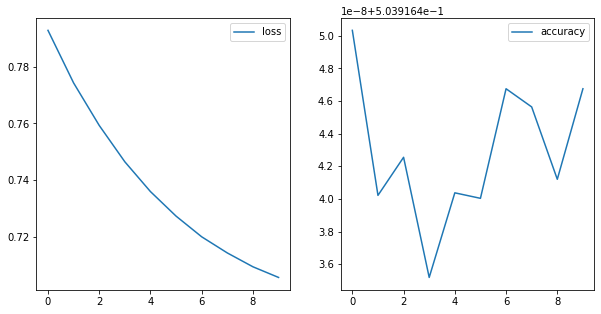

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, results.history['loss'], ax=ax1, label='loss')
sns.lineplot(results.epoch, results.history['acc'], ax=ax2, label='accuracy')

We have two plots above both relating to the quality fo our model.  The left-hand plot is our loss. It uses the probabilities associated with our predictions to judge how well our prediction fits reality. We want it to decrease as far as possible.

The accuracy judges how well the predictions are after applying the threshold at the output layer.  We want accuracy to increase.

If we look at our loss, it is still decreasing. That is a signal that our model is **still learning**. If our model is still learning, we can allow it to get better by turning several dials. First, let's increase the number of epochs.

In [28]:
# Review: what is an epoch?
one_random_student(mccalister)

Johnhoy


In [44]:
model = Sequential()
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD' ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1149/1149 [==============================] - 0s 210us/step - loss: 0.7099 - acc: 0.5039
Epoch 2/50
1149/1149 [==============================] - 0s 32us/step - loss: 0.6980 - acc: 0.5039
Epoch 3/50
1149/1149 [==============================] - 0s 34us/step - loss: 0.6919 - acc: 0.5039
Epoch 4/50
1149/1149 [==============================] - 0s 35us/step - loss: 0.6889 - acc: 0.5039
Epoch 5/50
1149/1149 [==============================] - 0s 37us/step - loss: 0.6873 - acc: 0.5039
Epoch 6/50
1149/1149 [==============================] - 0s 42us/step - loss: 0.6863 - acc: 0.5065
Epoch 7/50
1149/1149 [==============================] - 0s 34us/step - loss: 0.6857 - acc: 0.5344
Epoch 8/50
1149/1149 [==============================] - 0s 39us/step - loss: 0.6853 - acc: 0.5953
Epoch 9/50
1149/1149 [==============================] - 0s 38us/step - loss: 0.6850 - acc: 0.6562
Epoch 10/50
1149/1149 [==============================] - 0s 35us/step - loss: 0.6847 - acc: 0.6458
Epoch 11/50
1149/1

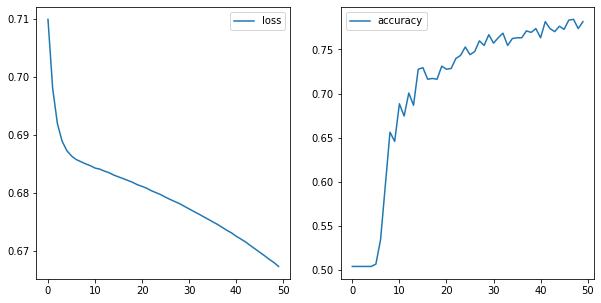

In [45]:
sigmoid_loss = results.history['loss']
sigmoid_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, sigmoid_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, sigmoid_accuracy, ax=ax2, label='accuracy')

It still looks like our model has not **converged**. Convergence is when our model has plateaued after adjusting the parameters to their optimal values. 

The loss is still decreasing, and the accuracy is still increasing.  We could continue increasing the epochs, but that will be time consuming.  

We could try decreasing the batch size. Let's set the batch size to 1.  This is true stochastic gradient descent.  The parameters are updated after each sample is passed into the model.

SGD with a small batch size takes longer to run through an epoch, but will take less epochs to improve.

In [31]:
model = Sequential()
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD' ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1149/1149 [==============================] - 1s 872us/step - loss: 0.6870 - acc: 0.5518
Epoch 2/10
1149/1149 [==============================] - 1s 762us/step - loss: 0.6685 - acc: 0.6806
Epoch 3/10
1149/1149 [==============================] - 1s 771us/step - loss: 0.6349 - acc: 0.7258
Epoch 4/10
1149/1149 [==============================] - 1s 744us/step - loss: 0.5775 - acc: 0.8085
Epoch 5/10
1149/1149 [==============================] - 1s 736us/step - loss: 0.4877 - acc: 0.8390
Epoch 6/10
1149/1149 [==============================] - 1s 750us/step - loss: 0.4023 - acc: 0.8555
Epoch 7/10
1149/1149 [==============================] - 1s 734us/step - loss: 0.3438 - acc: 0.8668
Epoch 8/10
1149/1149 [==============================] - 1s 775us/step - loss: 0.3078 - acc: 0.8834
Epoch 9/10
1149/1149 [==============================] - 1s 745us/step - loss: 0.2823 - acc: 0.8886
Epoch 10/10
1149/1149 [==============================] - 1s 759us/step - loss: 0.2660 - acc: 0.8886


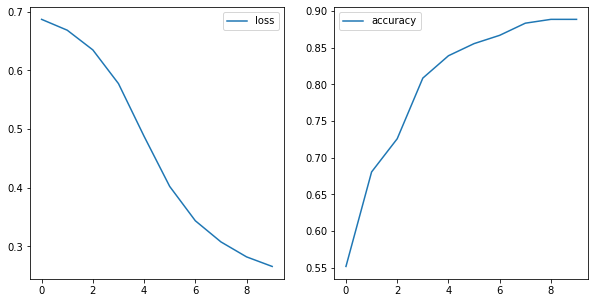

In [32]:
sigmoid_one_loss = results.history['loss']
sigmoid_one_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, sigmoid_one_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, sigmoid_one_accuracy, ax=ax2, label='accuracy')

Comparing our 50 epoch version with a 500 batch size and a 10 epoch version with a 1 example batch size, we see that by 10 epochs, the latter has achieved 90% accuracy by the final epoch, while our 23 batch size is just about 70%.  However, with the 1 example batch, each epoch took a lot longer.

Still, even though the 2nd model reached a higher accuracy and lower loss, it looks like it still has not stopped learning. The slope of the loss is getting smaller, but it has not leveled out completely.

From yesterday's lesson, you may remember that the vanilla SGD optimizer applies a constant learning rate accross all values.  Let's look at the default value.  

If we increase the learning rate, our parameter adjustments will take bigger steps, allowing us to proceed more quickly down the gradient.

In [34]:
from keras.optimizers import SGD

model = Sequential()

sgd = SGD(lr=.02)
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer=sgd ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1149/1149 [==============================] - 1s 931us/step - loss: 0.6910 - acc: 0.5152
Epoch 2/10
1149/1149 [==============================] - 1s 766us/step - loss: 0.6618 - acc: 0.6641
Epoch 3/10
1149/1149 [==============================] - 1s 792us/step - loss: 0.5567 - acc: 0.7981
Epoch 4/10
1149/1149 [==============================] - 1s 769us/step - loss: 0.3958 - acc: 0.8381
Epoch 5/10
1149/1149 [==============================] - 1s 738us/step - loss: 0.3101 - acc: 0.8816
Epoch 6/10
1149/1149 [==============================] - 1s 792us/step - loss: 0.2702 - acc: 0.8886
Epoch 7/10
1149/1149 [==============================] - 1s 735us/step - loss: 0.2504 - acc: 0.8956
Epoch 8/10
1149/1149 [==============================] - 1s 751us/step - loss: 0.2347 - acc: 0.9025
Epoch 9/10
1149/1149 [==============================] - 1s 757us/step - loss: 0.2214 - acc: 0.9060
Epoch 10/10
1149/1149 [==============================] - 1s 763us/step - loss: 0.2119 - acc: 0.9104


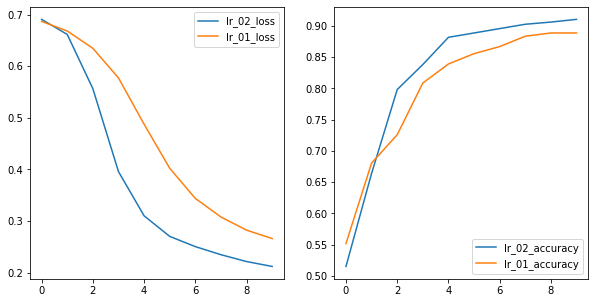

In [38]:
lr_02_loss = results.history['loss']
lr_02_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, lr_02_loss, ax=ax1, label='lr_02_loss')
sns.lineplot(results.epoch, lr_02_accuracy, ax=ax2, label='lr_02_accuracy')

sns.lineplot(results.epoch,sigmoid_one_loss, ax=ax1, label='lr_01_loss')
sns.lineplot(results.epoch, sigmoid_one_accuracy, ax=ax2, label='lr_01_accuracy')




If we increase the learning rate to a very high number, we see that our model overshoots the minimum, and starts bouncing all around.

Epoch 1/30
1149/1149 [==============================] - 0s 344us/step - loss: 0.9546 - acc: 0.5283
Epoch 2/30
1149/1149 [==============================] - 0s 86us/step - loss: 0.9878 - acc: 0.4909
Epoch 3/30
1149/1149 [==============================] - 0s 98us/step - loss: 0.9413 - acc: 0.5257
Epoch 4/30
1149/1149 [==============================] - 0s 99us/step - loss: 1.1088 - acc: 0.4865
Epoch 5/30
1149/1149 [==============================] - 0s 92us/step - loss: 1.0151 - acc: 0.4970
Epoch 6/30
1149/1149 [==============================] - 0s 87us/step - loss: 1.0805 - acc: 0.4795
Epoch 7/30
1149/1149 [==============================] - 0s 83us/step - loss: 1.1492 - acc: 0.4865
Epoch 8/30
1149/1149 [==============================] - 0s 99us/step - loss: 1.0375 - acc: 0.4909
Epoch 9/30
1149/1149 [==============================] - 0s 98us/step - loss: 1.0884 - acc: 0.4891
Epoch 10/30
1149/1149 [==============================] - 0s 92us/step - loss: 1.1105 - acc: 0.4874
Epoch 11/30
1149/1

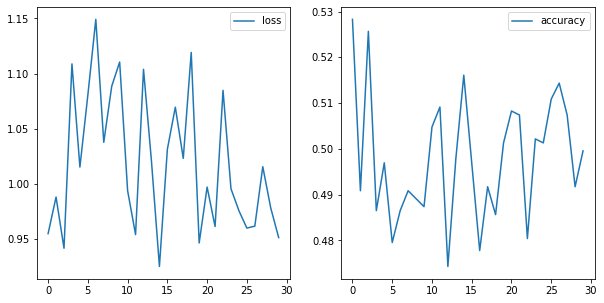

In [41]:
from keras.optimizers import SGD

model = Sequential()

sgd = SGD(lr=9)
model.add(Dense(12, activation='sigmoid', input_dim=64,))
model.add(Dense(8 ,  activation='sigmoid' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer=sgd ,
              loss='binary_crossentropy'  ,
              metrics=['accuracy'])

# Assign the variable history to store the results, and set verbose=1 so we can see the output.
results = model.fit(X_t, y_t, epochs=30, batch_size=10, verbose=1)

relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

Let's get a bit more modern, and apply a relu activation function in our layers.

In [42]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# We can tinker with verbose to show the output
results = model.fit(X_t, y_t, epochs=50, batch_size= 32, verbose=0)

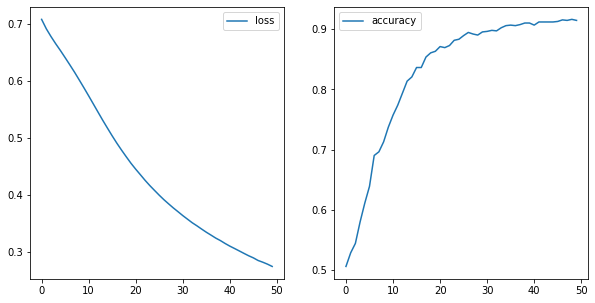

In [43]:
relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

Compared to our original sigmoid with 50 epochs and batch 32, the relu activation reaches a much higher accuracy

Let's try batch size 1

In [46]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# We can tinker with verbose to show the output
results = model.fit(X_t, y_t, epochs=10, batch_size= 1, verbose=1)

Epoch 1/10
1149/1149 [==============================] - 1s 994us/step - loss: 0.4985 - acc: 0.7772
Epoch 2/10
1149/1149 [==============================] - 1s 809us/step - loss: 0.3385 - acc: 0.8808
Epoch 3/10
1149/1149 [==============================] - 1s 797us/step - loss: 0.2547 - acc: 0.9138 0s - loss: 0.2830
Epoch 4/10
1149/1149 [==============================] - 1s 781us/step - loss: 0.2057 - acc: 0.9304
Epoch 5/10
1149/1149 [==============================] - 1s 798us/step - loss: 0.1799 - acc: 0.9321
Epoch 6/10
1149/1149 [==============================] - 1s 775us/step - loss: 0.1458 - acc: 0.9504
Epoch 7/10
1149/1149 [==============================] - 1s 839us/step - loss: 0.1347 - acc: 0.9521
Epoch 8/10
1149/1149 [==============================] - 1s 770us/step - loss: 0.1170 - acc: 0.9565
Epoch 9/10
1149/1149 [==============================] - 1s 783us/step - loss: 0.1061 - acc: 0.9661
Epoch 10/10
1149/1149 [==============================] - 1s 826us/step - loss: 0.1021 - acc

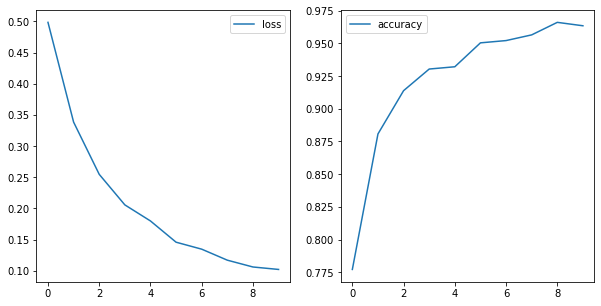

In [47]:
relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

We are reaching a high accuracy, but still looks like our model has not converged. If we increased our number of epochs, we would be looking at a long wait.

We have been implementing the vanilla version of gradient descent.  Remember, SGD updates the parameters uniformly across the board.  Let's try out an optimizer used more often these days.

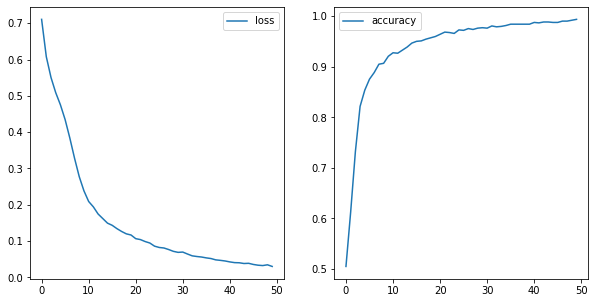

In [51]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# We can tinker with verbose to show the output
results = model.fit(X_t, y_t, epochs=50, batch_size= 32, verbose=0)

relu_loss = results.history['loss']
relu_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, relu_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, relu_accuracy, ax=ax2, label='accuracy')

Now our accuracy is really improving, and it looks like our learning may be leveling out.

Since Adam and relu are relatively faster than SGD and sigmoid, we can add more epochs, and more layers without the training time getting unwieldy.

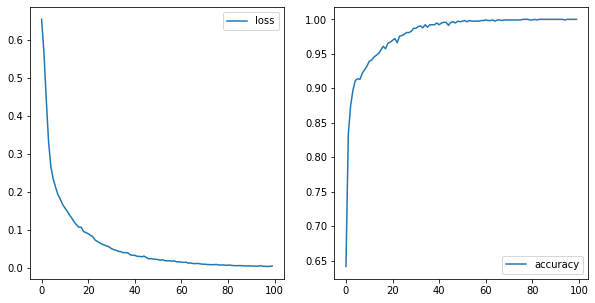

In [52]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0)

adam_loss = results.history['loss']
adam_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, adam_loss, ax=ax1, label='loss')
sns.lineplot(results.epoch, adam_accuracy, ax=ax2, label='accuracy')

No it looks like we're getting somewhere.

For comparison, look at how much more quickly Adam learns than SGD.

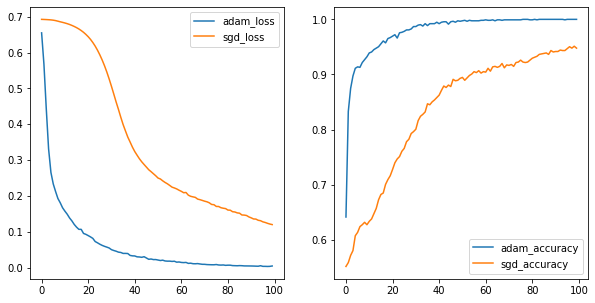

In [53]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0)

sgd_loss = results.history['loss']
sgd_accuracy = results.history['acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, adam_loss, ax=ax1, label='adam_loss')
sns.lineplot(results.epoch, adam_accuracy, ax=ax2, label='adam_accuracy')

sns.lineplot(results.epoch, sgd_loss, ax=ax1, label='sgd_loss')
sns.lineplot(results.epoch, sgd_accuracy, ax=ax2, label='sgd_accuracy')

We have been looking only at our training set. Let's add in our validation set to the picture.

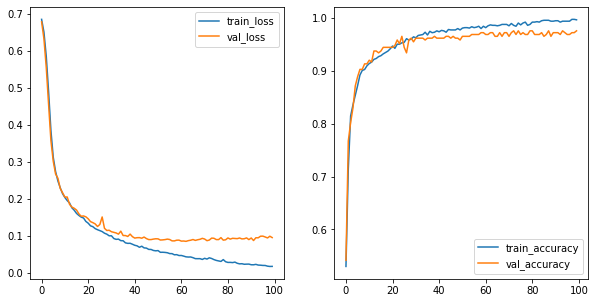

In [55]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

Consider that we still see our loss decreasing and our accuracy increasing.  We try to add more complexity to our model by adding more layers.

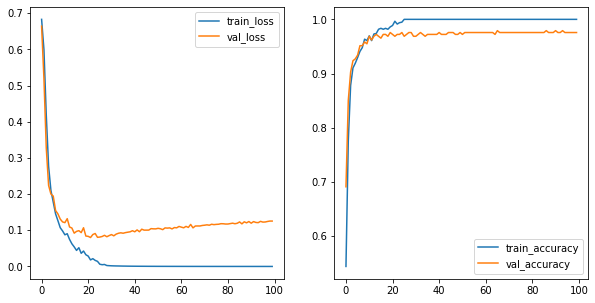

In [56]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

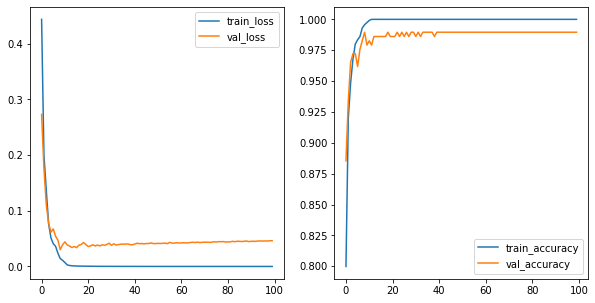

In [57]:
np.random.seed(42)

model = Sequential()
model.add(Dense(300, activation='relu', input_dim=64,))
model.add(Dense(200 ,  activation='relu' ))

model.add(Dense(80 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

In both models above, we see that our loss has begun to increase slightly. 

This is a sign that our model is overfit.  Just like in our previous models, after a certain amount of learning, the loss on the validation set starts increasing.

# Regularization


Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [58]:
from keras import regularizers

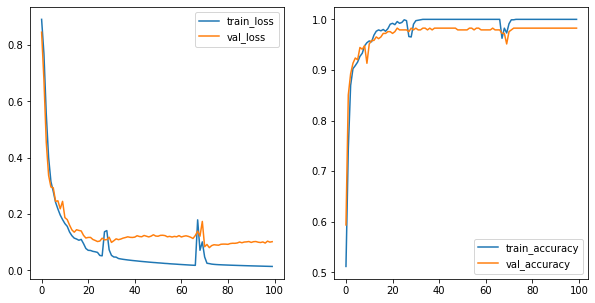

In [59]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(12 ,  activation='relu'))
model.add(Dense(12 ,  activation='relu',  ))
model.add(Dense(12 ,  activation='relu', ))
model.add(Dense(8 ,  activation='relu' ,))
model.add(Dense(4 ,  activation='relu'))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

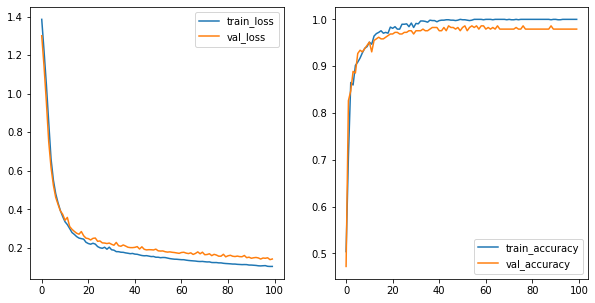

In [60]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(12 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(12 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01) ))
model.add(Dense(12 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8 ,  activation='relu' , kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(4 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01) ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

# Dropout

We can specify a dropout layer in keras, which randomly shuts off different nodes during training.

![drop_out](img/drop_out.png)

In [61]:
from keras.layers import Dropout

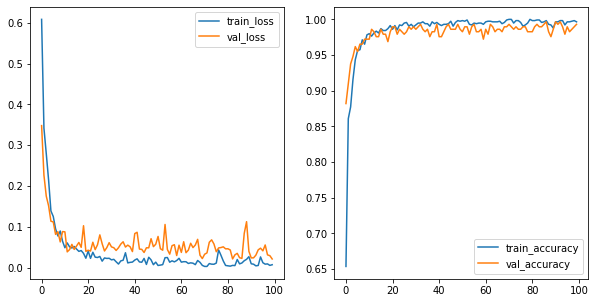

In [67]:
np.random.seed(42)

model = Sequential()
model.add(Dense(300, activation='relu', input_dim=64,))
model.add(Dropout(.5))
model.add(Dense(200 ,  activation='relu' ))
model.add(Dropout(.5))
model.add(Dense(80 ,  activation='relu' ))
model.add(Dropout(.1))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

# Early Stopping

We can also tell our neural network to stop once it stops realizing any gain.

In [69]:
from keras.callbacks import EarlyStopping


This is the model with no early stopping.

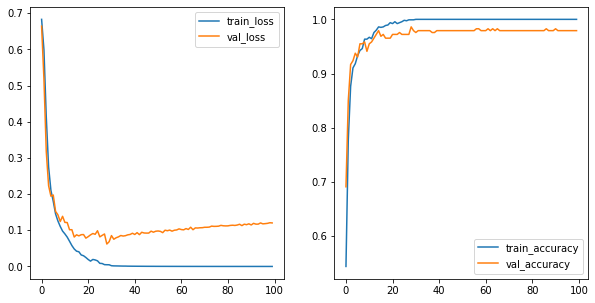

In [206]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val))

train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

Here we tell it to stop once the a very small positive change in the validation loss occurs.

Epoch 00006: early stopping


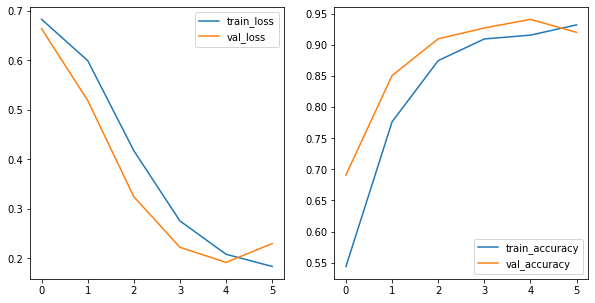

In [70]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=0, verbose=1,
                           mode='min')
results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val),
                   callbacks=[early_stop])



train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

That stopped too early.  We can specify the number of epochs that it doesn't see decrease in the loss with the `patience` parameter. 

Epoch 00044: early stopping


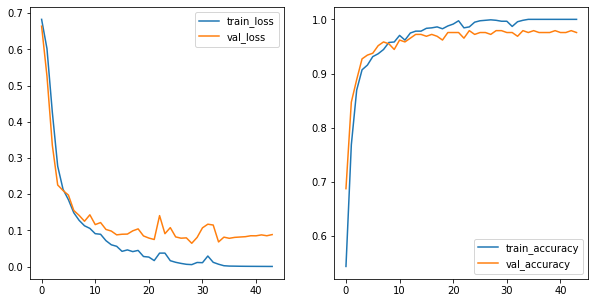

In [71]:
np.random.seed(42)

model = Sequential()
model.add(Dense(30, activation='relu', input_dim=64,))
model.add(Dense(20 ,  activation='relu' ))

model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(12 ,  activation='relu' ))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(4 ,  activation='relu' ))
model.add(Dense(1 , activation = 'sigmoid' ))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=15, verbose=1,
                           mode='min')
results = model.fit(X_t, y_t, epochs=100, batch_size= 32, verbose=0, validation_data=(X_val, y_val),
                   callbacks=[early_stop])



train_loss = results.history['loss']
train_acc = results.history['acc']
val_loss = results.history['val_loss']
val_acc = results.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(results.epoch, train_loss, ax=ax1, label='train_loss')
sns.lineplot(results.epoch, train_acc, ax=ax2, label='train_accuracy')

sns.lineplot(results.epoch, val_loss, ax=ax1, label='val_loss')
sns.lineplot(results.epoch, val_acc, ax=ax2, label='val_accuracy')

# Multiclass Classification and Softmax

Now let's return to the original problem: predicting 0 through 9

In [83]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X = digits.data
y = digits.target

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=.2)
X_t, X_val, X_test = X_t/16, X_val/16, X_test/16


In [ ]:
For a multiclass output, our neural net expects our target to be in a certain form.

In [85]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_t = ohe.fit_transform(y_t.reshape(-1,1))
y_val = ohe.transform(y_val.reshape(-1,1))
y_test = ohe.transform(y_test.reshape(-1,1))

What is different in the code below from the code above?

In [91]:
one_random_student(mccalister)

Adam


In [86]:
model = Sequential()
model.add(Dense(12, activation='relu', input_dim=64,))
model.add(Dense(8 ,  activation='relu' ))
model.add(Dense(10 , activation = 'softmax' ))

model.compile(optimizer='adam',
              loss='categorical_crossentropy'  ,
              metrics=['accuracy'])
results = model.fit(X_t, y_t, epochs=50, batch_size= 10, validation_data=(X_val, y_val))

Train on 1149 samples, validate on 288 samples
Epoch 1/50
1149/1149 [==============================] - 1s 1ms/step - loss: 2.2511 - acc: 0.2037 - val_loss: 2.1275 - val_acc: 0.2813
Epoch 2/50
1149/1149 [==============================] - 0s 161us/step - loss: 2.0132 - acc: 0.2942 - val_loss: 1.8250 - val_acc: 0.3403
Epoch 3/50
1149/1149 [==============================] - 0s 159us/step - loss: 1.6929 - acc: 0.4291 - val_loss: 1.4559 - val_acc: 0.5451
Epoch 4/50
1149/1149 [==============================] - 0s 155us/step - loss: 1.2981 - acc: 0.6240 - val_loss: 1.0919 - val_acc: 0.6771
Epoch 5/50
1149/1149 [==============================] - 0s 160us/step - loss: 0.9735 - acc: 0.7050 - val_loss: 0.8405 - val_acc: 0.7222
Epoch 6/50
1149/1149 [==============================] - 0s 177us/step - loss: 0.7705 - acc: 0.7615 - val_loss: 0.6967 - val_acc: 0.7847
Epoch 7/50
1149/1149 [==============================] - 0s 204us/step - loss: 0.6380 - acc: 0.8198 - val_loss: 0.5776 - val_acc: 0.8194
Epo

In [87]:
history = results.history
training_loss = history['loss']
val_loss = history['val_loss']
training_accuracy = history['acc']
val_accuracy = history['val_acc']


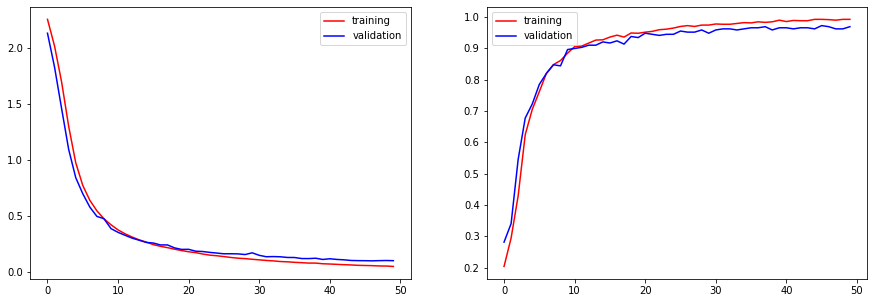

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))


sns.lineplot(list(range(len(training_loss))), training_loss, c='r', label='training', ax=ax1)
sns.lineplot(list(range(len(val_loss))), val_loss, c='b', label='validation', ax=ax1)
sns.lineplot(list(range(len(training_loss))), training_accuracy, c='r', label='training',ax=ax2)
sns.lineplot(list(range(len(val_loss))), val_accuracy, c='b', label='validation',ax=ax2)
ax1.legend()

In [89]:
y_hat_test = model.predict_classes(X_test)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_test = ohe.inverse_transform(y_test)
confusion_matrix(y_test, y_hat_test)

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 32,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  1,  0,  0,  1,  0,  0, 26,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  1, 37]])

Wow, look at that performance!  

That is great, but remember, we were dealing with simple black and white images.  With color, our basic neural net will have less success.

We will explore more advanced tools in the coming days.
